<a href="https://colab.research.google.com/github/Evadacunha/2024_ells_python/blob/main/Thursday_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image processing
What is an image mathematically?
8-bit (0-255) information per pixel: if it is 0 = black, 1 = white
for example 3x3 pixels
RGB: arrays


In [20]:
print("------Import necessary libraries.")
import numpy as np #RGB so arrays, we can use numpy
import matplotlib.pyplot as plt #to visualize arrays
import cv2 #image processing library

------Import necessary libraries.



------Make an image consisting of one pixel:


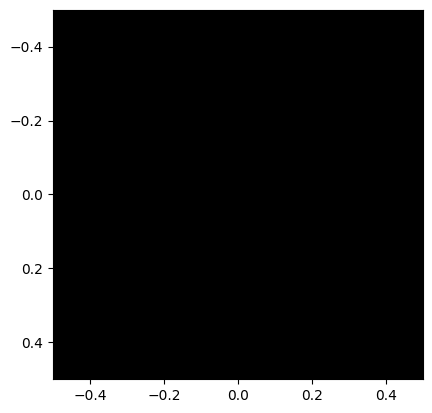


------Add some more pixels:


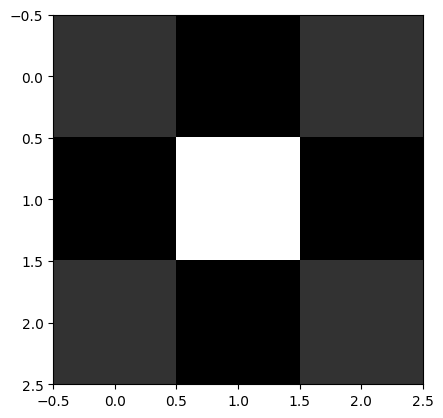

In [12]:
print("\n------Make an image consisting of one pixel:")
image=np.array([[0]]) #square brackets necessary to make matrix, brackets inside is to make a pixel
plt.imshow(image, cmap='gray') #specifiy grayscale: 0-255
plt.show() #does a pixel have a certain size?
print("\n------Add some more pixels:")
image2=np.array([[50, 0, 50],[0,255,0],[50,0,50]])
plt.imshow(image2, cmap='gray')
plt.show()


-----Make colored pixels:


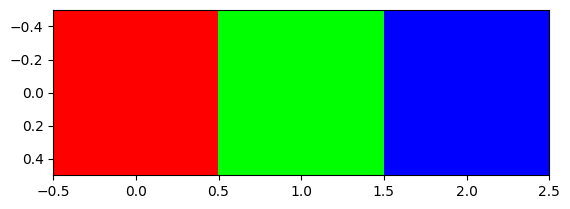

In [13]:
print("-----Make colored pixels:")
image_rgb=np.array([[[255,0,0],[0,255,0],[0,0,255]]])
plt.imshow(image_rgb) #no longer specify cmap
plt.show()

-----Make an extra row of pink pixels:


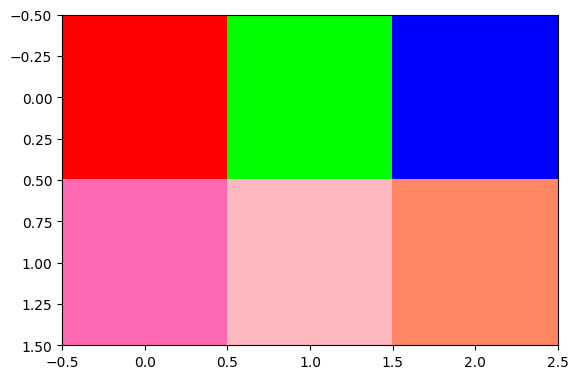

In [18]:
print("-----Make an extra row of pink pixels:")
image_rgb=np.array([[[255,0,0],[0,255,0],[0,0,255]],[[255, 105, 180],[255, 185, 190],[255, 135, 100]]])
plt.imshow(image_rgb) #no longer specify cmap
plt.show()

-----Time to import an image, and convert BRG to RGB:



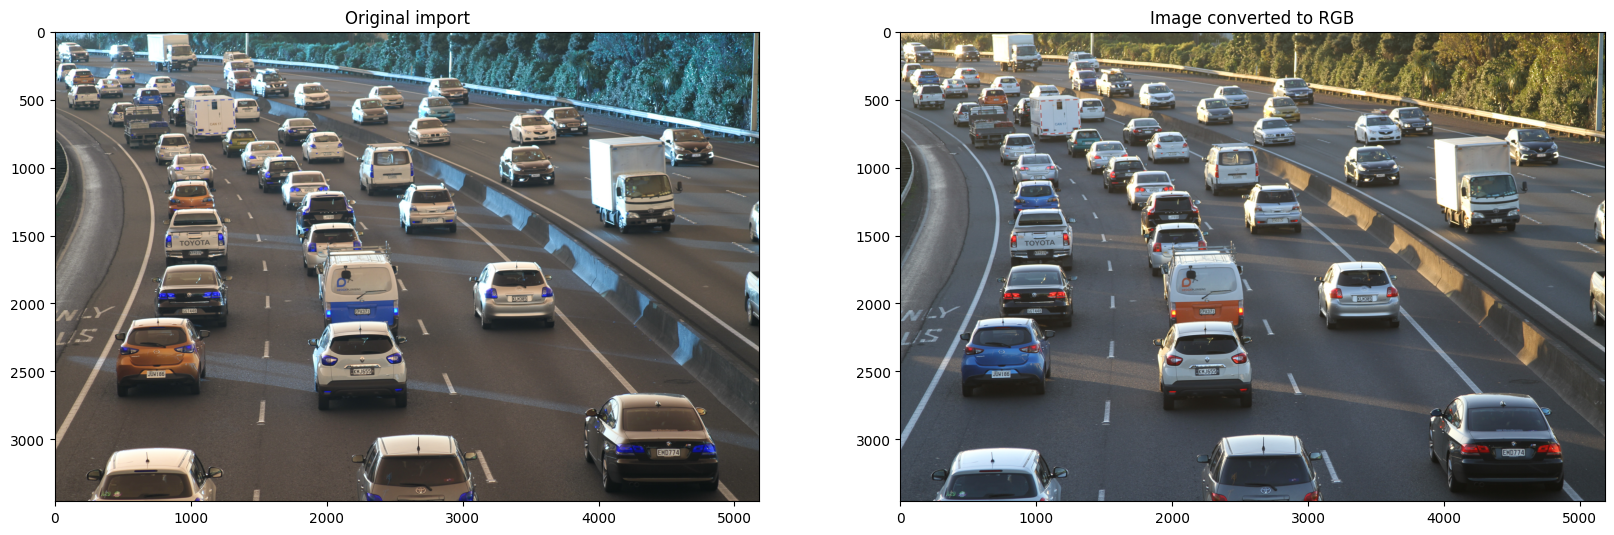

In [29]:
print("-----Time to import an image, and convert BRG to RGB:\n")
#image_cars=cv2.imread('cars.jpg')
#CV imports as BGR instead of RGB
image_cars=cv2.imread('/content/cars.jpg')
image_rgb=cv2.cvtColor(image_cars, cv2.COLOR_BGR2RGB) #function that converts color
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(image_cars)
plt.title('Original import')
plt.subplot(1,2,2)
plt.imshow(image_rgb)
plt.title('Image converted to RGB')
plt.show()



Conversion to grey-scale:


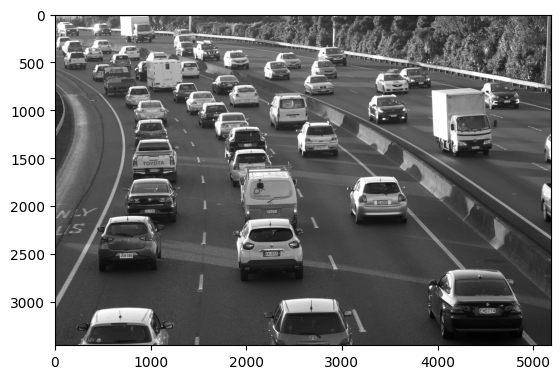

In [32]:
#often you want to convert to grey-scale: algorithms can find certain things easier, faster, less complex
print("Conversion to grey-scale:")
image_grey=cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(image_grey,cmap='gray') #if you don't put in cmap, it will detect the image and read the number as one value, and add two zeros to it
plt.show()

In [33]:
print("If you just print the image directly, you will get an array of numbers representing the image:")
print(image_grey)

[[213 216 220 ...  67  69  78]
 [216 217 219 ...  70  73  82]
 [216 216 218 ...  70  73  83]
 ...
 [ 62  63  63 ...  52  52  53]
 [ 63  64  63 ...  53  52  52]
 [ 66  67  67 ...  55  54  52]]


Make a blurred image:


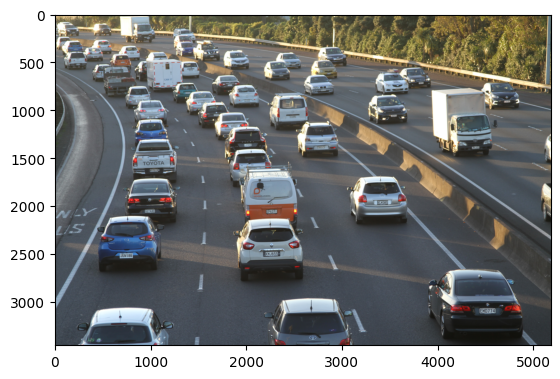

In [54]:
#blurring an image is done often to make the image smoother and make it contain less information
print("Make a blurred image:")
blurred_image=cv2.GaussianBlur(image_rgb,(7,7),0) #(... ) gives the amount of blur
plt.imshow(blurred_image)
plt.show()
#The size of the image remains the same, but every 55x55 pixels are replaced by the same amount of pixels, in one averaged color over the specified grid of pixels.

Print the edges of the different types of pictures:


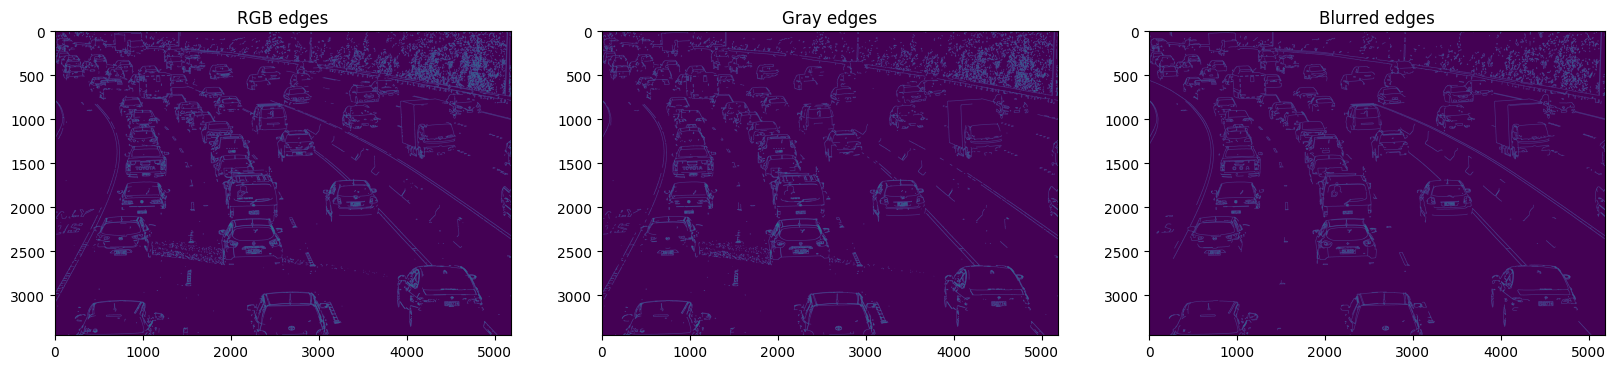

In [58]:
#Edge detection
print("Print the edges of the different types of pictures:")
edges=cv2.Canny(image_rgb,100,200) #lower and upper threshold
edges_grey=cv2.Canny(image_grey,100,200)
edges_blurred=cv2.Canny(blurred_image,50,200)
#wider range detects more edges
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(edges)
plt.title("RGB edges")
plt.subplot(1,3,2)
plt.imshow(edges_grey)
plt.title("Gray edges")
plt.subplot(1,3,3)
plt.imshow(edges_blurred)
plt.title("Blurred edges")
plt.show()
#not a big difference in RGB and GRAY, but there is a big difference with BLUR
#removes some of the unnecessary details/noise from your image

We are going to resize the image to a certain amount of pixels:


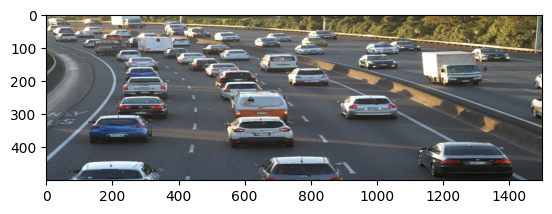

In [63]:
#Resizing the image
print("We are going to resize the image to a certain amount of pixels:")
image_resized=cv2.resize(image_rgb,(1500,500)) #always cv2. in this library, so super easy
plt.imshow(image_resized)
plt.show()
#important for neural networks: input = matrix, expects inputs of the same size than the images used for training
#you can resize to a smaller size, when saving, it will take up less storage
#losing shape of picture can be a problem, for detecting something with the trained neural network